In [ ]:
# libraries

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/data/data.csv')

In [ ]:
data.head()

,Subject,Description,Type
0,Fwd: Questions,Forwarded message --------- From: Andrea Mica...,Question
1,Engati updates,"Hi Aaron, Just following up on our earlier con...",Incident
2,JSON API Response Question,"Hi Support, Hopefully a quick question. If I a...",Question
3,HELP!,When I try to access this url from browser (fo...,Question
4,Engati Genius Session,"Hi Engati Support, You have received a new re...",Question


In [ ]:
data['Type'].value_counts()

Question           141
Incident            38
Problem             27
Feature Request     24
Name: Type, dtype: int64

In [ ]:
data['Category']=data['Description'].astype(str)+" "+ data['Subject']

In [ ]:
data.head()

,Subject,Description,Type,Category
0,Fwd: Questions,Forwarded message --------- From: Andrea Mica...,Question,Forwarded message --------- From: Andrea Mica...
1,Engati updates,"Hi Aaron, Just following up on our earlier con...",Incident,"Hi Aaron, Just following up on our earlier con..."
2,JSON API Response Question,"Hi Support, Hopefully a quick question. If I a...",Question,"Hi Support, Hopefully a quick question. If I a..."
3,HELP!,When I try to access this url from browser (fo...,Question,When I try to access this url from browser (fo...
4,Engati Genius Session,"Hi Engati Support, You have received a new re...",Question,"Hi Engati Support, You have received a new re..."


In [ ]:
data.columns=['Subject', 'Description1', 'Category', 'Description']

In [ ]:
data.head()

,Subject,Description1,Category,Description
0,Fwd: Questions,Forwarded message --------- From: Andrea Mica...,Question,Forwarded message --------- From: Andrea Mica...
1,Engati updates,"Hi Aaron, Just following up on our earlier con...",Incident,"Hi Aaron, Just following up on our earlier con..."
2,JSON API Response Question,"Hi Support, Hopefully a quick question. If I a...",Question,"Hi Support, Hopefully a quick question. If I a..."
3,HELP!,When I try to access this url from browser (fo...,Question,When I try to access this url from browser (fo...
4,Engati Genius Session,"Hi Engati Support, You have received a new re...",Question,"Hi Engati Support, You have received a new re..."


In [ ]:
data.drop(['Subject','Description1'],axis=1,inplace=True)

In [ ]:
data.head()

,Category,Description
0,Question,Forwarded message --------- From: Andrea Mica...
1,Incident,"Hi Aaron, Just following up on our earlier con..."
2,Question,"Hi Support, Hopefully a quick question. If I a..."
3,Question,When I try to access this url from browser (fo...
4,Question,"Hi Engati Support, You have received a new re..."


In [ ]:
data['target'] = data.Category.astype('category').cat.codes

In [ ]:
data.head()

,Category,Description,target
0,Question,Forwarded message --------- From: Andrea Mica...,3
1,Incident,"Hi Aaron, Just following up on our earlier con...",1
2,Question,"Hi Support, Hopefully a quick question. If I a...",3
3,Question,When I try to access this url from browser (fo...,3
4,Question,"Hi Engati Support, You have received a new re...",3


In [ ]:
data['Description']=data['Description'].astype(str)
data['num_words'] = data.Description.apply(lambda x : len(x.split()))

In [ ]:
data.head()

,Category,Description,target,num_words
0,Question,Forwarded message --------- From: Andrea Mica...,3,413
1,Incident,"Hi Aaron, Just following up on our earlier con...",1,255
2,Question,"Hi Support, Hopefully a quick question. If I a...",3,185
3,Question,When I try to access this url from browser (fo...,3,94
4,Question,"Hi Engati Support, You have received a new re...",3,115


In [ ]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [ ]:
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

,bins,counts
0,0-100,112
1,100-300,86
2,300-500,12
3,500-800,6
4,>800,14


Text(0.5, 1.0, 'Word distribution per bin')

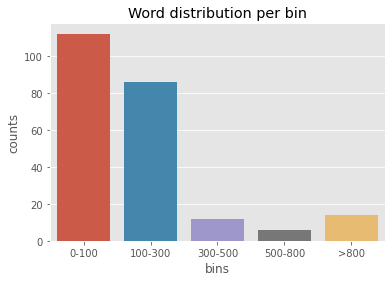

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [ ]:
data.head()

,Category,Description,target,num_words,bins
0,Question,Forwarded message --------- From: Andrea Mica...,3,413,300-500
1,Incident,"Hi Aaron, Just following up on our earlier con...",1,255,100-300
2,Question,"Hi Support, Hopefully a quick question. If I a...",3,185,100-300
3,Question,When I try to access this url from browser (fo...,3,94,0-100
4,Question,"Hi Engati Support, You have received a new re...",3,115,100-300


In [ ]:
num_class = len(np.unique(data.Category.values))
y = data['target'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
data['Description'] = data['Description'].astype(str)

In [ ]:
type(data['Description'])
data_description = data.Description.values
type(data_description)

numpy.ndarray

In [ ]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

0000 5.749270529961848
0003 5.749270529961848
0004 5.749270529961848
0006 5.749270529961848
01d39920 5.749270529961848
01d5c2e8 5.749270529961848
01d6432c 5.749270529961848
01d647c6 5.749270529961848
01d64af4 5.749270529961848
01d64fed 5.749270529961848
01d650b0 5.749270529961848
01d6515b 5.749270529961848
01d65382 5.749270529961848
01d653b7 5.749270529961848
01d65463 5.749270529961848
022 5.749270529961848
033 5.749270529961848
0337353e1db3 5.749270529961848
0530 5.749270529961848
0540 5.749270529961848
05984855 5.749270529961848
0752 5.749270529961848
094 5.749270529961848
0dbf64bc 5.749270529961848
0hf 5.749270529961848
0llznyb 5.749270529961848
0xa 5.749270529961848
1000 5.749270529961848
10000 5.749270529961848
100k 5.749270529961848
1023 5.749270529961848
10d67txepeddwz15imla 5.749270529961848
10th 5.749270529961848
1122 5.749270529961848
11431 5.749270529961848
121907 5.749270529961848
123 5.749270529961848
1242 5.749270529961848
13359 5.749270529961848
136 5.749270529961848
13j

In [ ]:
final_doc = data['Description']
all_documents = tuple(final_doc)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(230, 4014)
  (0, 1772)	0.03834008977485303
  (0, 3511)	0.03429281634156116
  (0, 1327)	0.03412352676487261
  (0, 2449)	0.03533789896189945
  (0, 3004)	0.03345954368052692
  (0, 2013)	0.03463549682646271
  (0, 2594)	0.03480893231583177
  (0, 791)	0.03516010939331362
  (0, 1744)	0.03480893231583177
  (0, 1007)	0.03412352676487261
  (0, 2339)	0.10390649047938813
  (0, 1221)	0.03480893231583177
  (0, 1409)	0.03516010939331362
  (0, 1406)	0.03533789896189945
  (0, 3300)	0.03412352676487261
  (0, 574)	0.03516010939331362
  (0, 2527)	0.06961786463166354
  (0, 2049)	0.03533789896189945
  (0, 2650)	0.03463549682646271
  (0, 1199)	0.0349837952738387
  (0, 2887)	0.04776579159155645
  (0, 1911)	0.025121803179471856
  (0, 1113)	0.02688004067060038
  (0, 2696)	0.024092980578670053
  (0, 1701)	0.03715855489835417
  :	:
  (229, 1704)	0.2781924140366396
  (229, 1078)	0.11059412186904351
  (229, 3823)	0.1580405302804669
  (229, 1422)	0.1390962070183198
  (229, 976)	0.08372020719475677
  (229, 1650)	0.0

In [ ]:
reindexed_data= data["Description"]

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

230
                                         Description  index
0   Forwarded message --------- From: Andrea Mica...      0
1  Hi Aaron, Just following up on our earlier con...      1
2  Hi Support, Hopefully a quick question. If I a...      2
3  When I try to access this url from browser (fo...      3
4   Hi Engati Support, You have received a new re...      4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
original document: 
['', 'Issue', 'reported', 'by', 'infovivada@gmail.com:', 'user', 'intent', 'This', 'email', 'was', 'sent', 'by:', 'Engati,', 'Bangalore,', 'Karnataka,', 'India', 'To', 'unsubscribe', 'click:', 'here', '--This', 'message', 'contains', 'confidential', 'information', 'and', 'is', 'intended', 'only', 'for', 'the', 'individual', 'named.', 'If', 'you', 'are', 'not', 'the', 'named', 'addressee', 'you', 'should', 'not', 'disseminate,', 'distribute', 'or', 'copy', 'this', 'e-mail.', 'You', 'cannot', 'use', 'or', 'forward', 'any', 'attachments', 'in', 'the', 'email.', 'Please', 'notify', 'the', 'sender', 'immediately', 'by', 'e-mail', 'if', 'you', 'have', 'received', 'this', 'email', 'by', 'mistake', 'and', 'delete', 'this', 'e-mail', 'from', 'your', 'system.', '', 'how', 'can', 'i', 'answer', 'question', 'by', 'user', 'intent']


 tokenized and lemmatized document: 
['i

0    [forward, messag, andrea, micallef, amicallef,...
1    [aaron, follow, earlier, convers, wonder, upda...
2    [support, hope, quick, question, make, json, v...
3    [access, browser, exampl, http, googl, analyt,...
4    [engati, support, receiv, request, engati, gen...
Name: Description, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 action
1 add
2 address
3 addresse
4 amicallef
5 andrea
6 archiv
7 attach
8 author
9 automat
10 away


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(0, 1),
 (6, 2),
 (9, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 5),
 (20, 2),
 (21, 2),
 (24, 1),
 (25, 6),
 (26, 1),
 (28, 2),
 (30, 2),
 (31, 2),
 (39, 3),
 (44, 2),
 (45, 1),
 (49, 1),
 (52, 3),
 (61, 2),
 (62, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (69, 6),
 (70, 1),
 (75, 2),
 (83, 5),
 (85, 1),
 (94, 1),
 (96, 1),
 (97, 2),
 (100, 1),
 (104, 1),
 (106, 1),
 (107, 1),
 (110, 2),
 (120, 1),
 (122, 1)]

In [ ]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 0 ("busi") appears 1 time.
Word 6 ("custom") appears 2 time.
Word 9 ("http") appears 2 time.
Word 13 ("product") appears 1 time.
Word 14 ("provid") appears 1 time.
Word 15 ("question") appears 1 time.
Word 16 ("regard") appears 5 time.
Word 20 ("team") appears 2 time.
Word 21 ("thank") appears 2 time.
Word 24 ("work") appears 1 time.
Word 25 ("aaron") appears 6 time.
Word 26 ("discuss") appears 1 time.
Word 28 ("follow") appears 2 time.
Word 30 ("issu") appears 2 time.
Word 31 ("updat") appears 2 time.
Word 39 ("support") appears 3 time.
Word 44 ("detail") appears 2 time.
Word 45 ("reach") appears 1 time.
Word 49 ("share") appears 1 time.
Word 52 ("gmail") appears 3 time.
Word 61 ("compani") appears 2 time.
Word 62 ("insur") appears 1 time.
Word 65 ("qatar") appears 1 time.
Word 66 ("stori") appears 1 time.
Word 67 ("success") appears 1 time.
Word 69 ("write") appears 6 time.
Word 70 ("youtub") appears 1 time.
Word 75 ("know") appears 2 time.
Word 83 ("whatsapp") appears 5 time.
W

In [ ]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.13902406333944906),
 (1, 0.13902406333944906),
 (2, 0.49250339518188296),
 (3, 0.09094365594665609),
 (4, 0.15727499148339985),
 (5, 0.2834158889162207),
 (6, 0.13058064075275747),
 (7, 0.1250284883776618),
 (8, 0.11367438666687782),
 (9, 0.11064647394184451),
 (10, 0.20249115646712262),
 (11, 0.13645442517551581),
 (12, 0.42512383337433113),
 (13, 0.11542457829913647),
 (14, 0.11722702210563),
 (15, 0.38144163136061),
 (16, 0.0490932427623927),
 (17, 0.16483201457312036),
 (18, 0.056650265852113205),
 (19, 0.1316216559131225),
 (20, 0.08529679726927329),
 (21, 0.046770749370722696),
 (22, 0.19971506254769397),
 (23, 0.16483201457312036),
 (24, 0.08977124272885909)]


In [ ]:

# Print the results
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.070*"mailto" + 0.038*"request" + 0.037*"send" + 0.036*"hatim" + 0.033*"respons"'), (1, '0.101*"http" + 0.050*"viafon" + 0.035*"support" + 0.030*"mailto" + 0.029*"group"'), (2, '0.102*"http" + 0.036*"hatim" + 0.027*"custom" + 0.025*"regard" + 0.025*"coviam"'), (3, '0.071*"http" + 0.043*"thank" + 0.037*"imag" + 0.036*"regard" + 0.027*"support"'), (4, '0.053*"queri" + 0.047*"send" + 0.039*"help" + 0.031*"custom" + 0.030*"mailto"')]
Topic: 0 
Words: 0.070*"mailto" + 0.038*"request" + 0.037*"send" + 0.036*"hatim" + 0.033*"respons" + 0.033*"http" + 0.033*"thank" + 0.028*"whatsapp" + 0.023*"document" + 0.021*"coviam"
Topic: 1 
Words: 0.101*"http" + 0.050*"viafon" + 0.035*"support" + 0.030*"mailto" + 0.029*"group" + 0.023*"cel" + 0.022*"houti" + 0.020*"facebook" + 0.020*"imag" + 0.020*"celsgroup"
Topic: 2 
Words: 0.102*"http" + 0.036*"hatim" + 0.027*"custom" + 0.025*"regard" + 0.025*"coviam" + 0.024*"thank" + 0.021*"write" + 0.019*"mailto" + 0.019*"know" + 0.018*"success"
Topic: 3 
Wor

In [ ]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 17.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=ad531a42f027f2bf65dd57d028c6654ef678c3c561e91c6100283c9399495a81
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=49f5b0ed0610292cfb1b73ec86968f3731c104dd80d80cf1926b7fc9786e02a1
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
# Visualize

import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.2,random_state=42)

In [ ]:
X_test

array([[   0,    0,    0, ...,  492,  340,  295],
       [   0,    0,    0, ...,   15,  663, 1070],
       [   0,    0,    0, ...,  897,  512, 1881],
       ...,
       [   0,    0,    0, ...,   62,  662,   97],
       [   1,   89,   63, ...,   14,  118,  146],
       [   0,    0,    0, ...,  203,    5,  657]], dtype=int32)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 128)          535296    
_________________________________________________________________
flatten (Flatten)            (None, 64000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                2048032   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 2,583,460
Trainable params: 2,583,460
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/3 [===================>..........] - ETA: 0s - loss: 1.6827 - acc: 0.5625
Epoch 00001: val_acc im

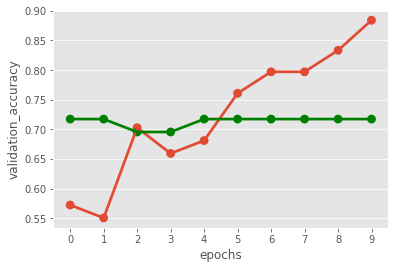

In [ ]:

df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [ ]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.4782608695652174

In [ ]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

NameError: ignored

In [ ]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          535296    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 586,916
Trainable params: 586,916
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=200, callbacks=[checkpointer])

Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 1.3776 - acc: 0.5217
Epoch 00001: val_acc improved from -inf to 0.71739, saving model to weights.hdf5
3/3 [==============================] - 1s 427ms/step - loss: 1.3776 - acc: 0.5217 - val_loss: 1.3463 - val_acc: 0.7174
Epoch 2/200
3/3 [==============================] - ETA: 0s - loss: 1.3370 - acc: 0.6159
Epoch 00002: val_acc did not improve from 0.71739
3/3 [==============================] - 1s 300ms/step - loss: 1.3370 - acc: 0.6159 - val_loss: 1.2891 - val_acc: 0.7174
Epoch 3/200
3/3 [==============================] - ETA: 0s - loss: 1.2770 - acc: 0.6159
Epoch 00003: val_acc did not improve from 0.71739
3/3 [==============================] - 1s 293ms/step - loss: 1.2770 - acc: 0.6159 - val_loss: 1.1892 - val_acc: 0.7174
Epoch 4/200
3/3 [==============================] - ETA: 0s - loss: 1.1729 - acc: 0.6159
Epoch 00004: val_acc did not improve from 0.71739
3/3 [==============================] - 1s 296ms/step - loss:

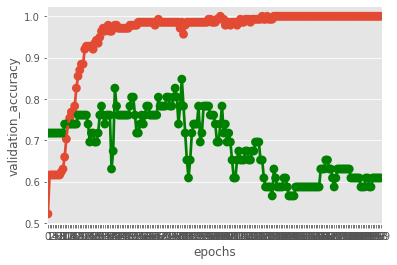

In [ ]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [ ]:
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(X_test)

In [ ]:
X_test

array([[   0,    0,    0, ...,  492,  340,  295],
       [   0,    0,    0, ...,   15,  663, 1070],
       [   0,    0,    0, ...,  897,  512, 1881],
       ...,
       [   0,    0,    0, ...,   62,  662,   97],
       [   1,   89,   63, ...,   14,  118,  146],
       [   0,    0,    0, ...,  203,    5,  657]], dtype=int32)

In [ ]:
predicted = np.argmax(predicted, axis=1)

In [ ]:
accuracy_score(y_test, predicted)

0.4782608695652174

In [ ]:
predicted

array([0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 1, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 0, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
df_1=pd.read_csv("/content/drive/My Drive/data/35000222607_tickets-July-22-2020-09_43.csv")

In [ ]:
df_1.head() 

,Subject,Description
0,Re: Query from Fwd FwdTest,"Hi, I will help you with the payment process. ..."
1,Tooltip alignment,Hi Tooltip isn't properly aligned with the '?'...
2,FW: Bot path doesn't work well with his flow key,"Hey, This is the URL to our Bot: https://www.m..."
3,Re: DPW Standalone DSN Setup,"Hi, Let me clarify. There are 2 ways to achiev..."
4,"Bug node ""request userdata""","Hi, There seems to be a bug in the system, whe..."
